All libraries imported successfully!
NLTK data downloaded!
📁 DATASET UPLOAD
Checking for existing dataset files...
Found existing CSV files: ['spam.csv']
❌ Failed to load 'spam.csv': No columns to parse from file

📤 No dataset found. Please upload your CSV file.
Click on 'Choose Files' below to upload your dataset...


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Saving spam.csv to spam (1).csv
📥 Uploaded file: spam (1).csv
✅ Successfully loaded uploaded file: 'spam (1).csv'
Dataset loaded successfully!
Dataset shape: (5572, 5)

Dataset columns: ['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

First 5 rows of the dataset:
     v1                                                 v2  Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...         NaN   
1   ham                      Ok lar... Joking wif u oni...         NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...         NaN   
3   ham  U dun say so early hor... U c already then say...         NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...         NaN   

   Unnamed: 3  Unnamed: 4  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN         NaN  

Analyzing dataset structure...

✅ Using columns: 'v1' as label, 'v2' as message
Final dataset shape: (5572, 2)

Cle

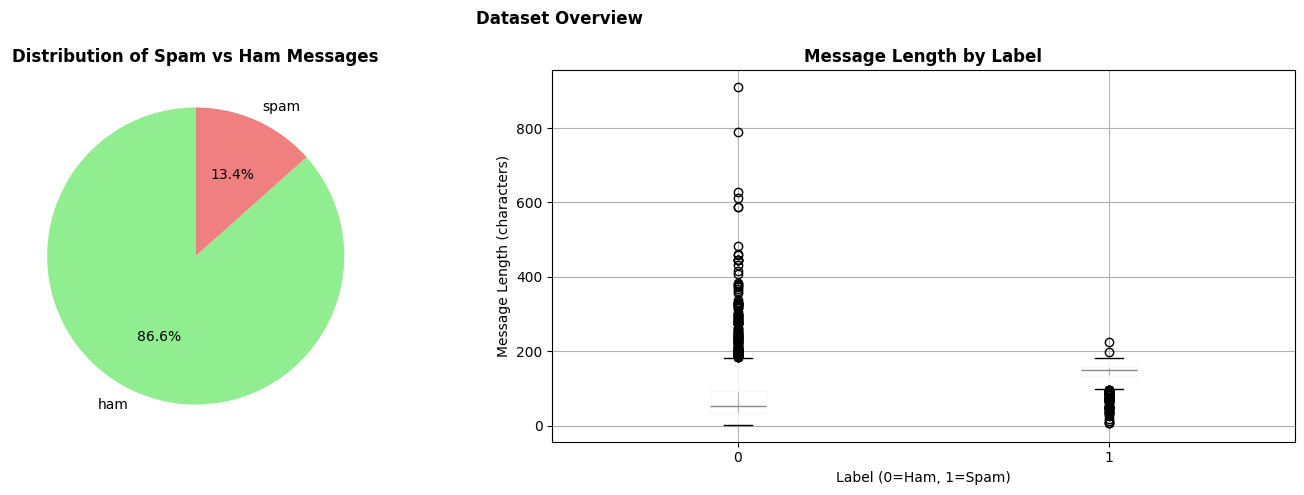


🔧 Preprocessing text messages...
✅ Text preprocessing completed!

📝 Preprocessing example:
Original: Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got a...
Processed: go jurong point crazi avail bugi n great world la e buffet cine got amor wat

🎨 Generating word clouds...


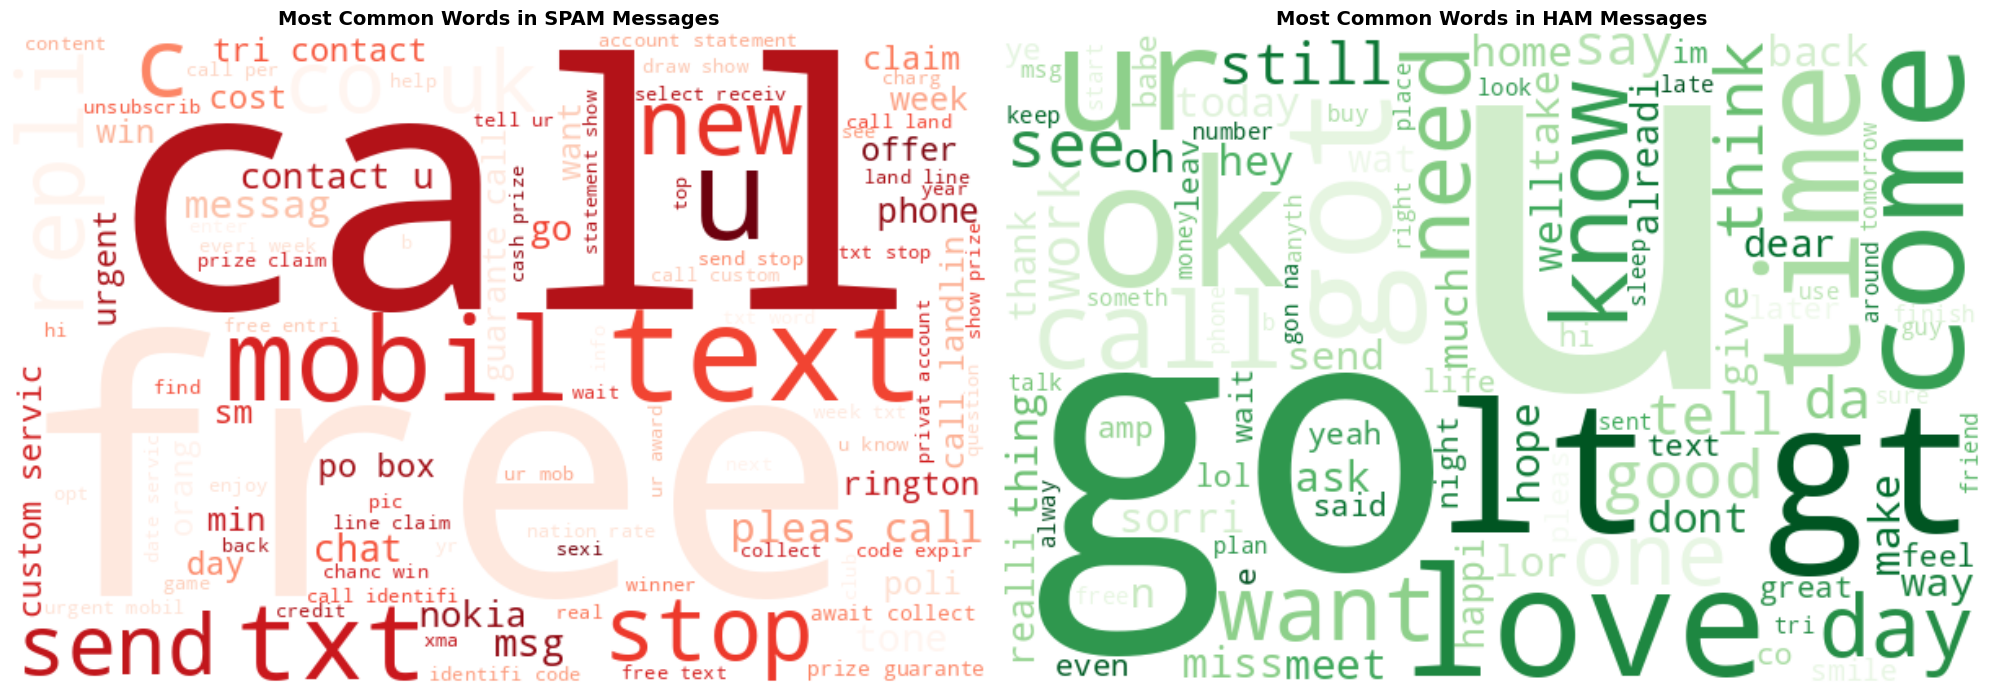


🔡 Performing feature extraction with TF-IDF...
✅ Feature extraction completed! Shape: (5572, 3000)

🤖 Training machine learning models...
Training set: 4457 samples
Testing set: 1115 samples

🔧 Training Multinomial Naive Bayes...
✅ Multinomial Naive Bayes -> Accuracy: 0.9785, Precision: 1.0000
Confusion Matrix:
 [[966   0]
 [ 24 125]]

🔧 Training Logistic Regression...
✅ Logistic Regression -> Accuracy: 0.9695, Precision: 1.0000
Confusion Matrix:
 [[966   0]
 [ 34 115]]

📈 Generating model performance visualizations...


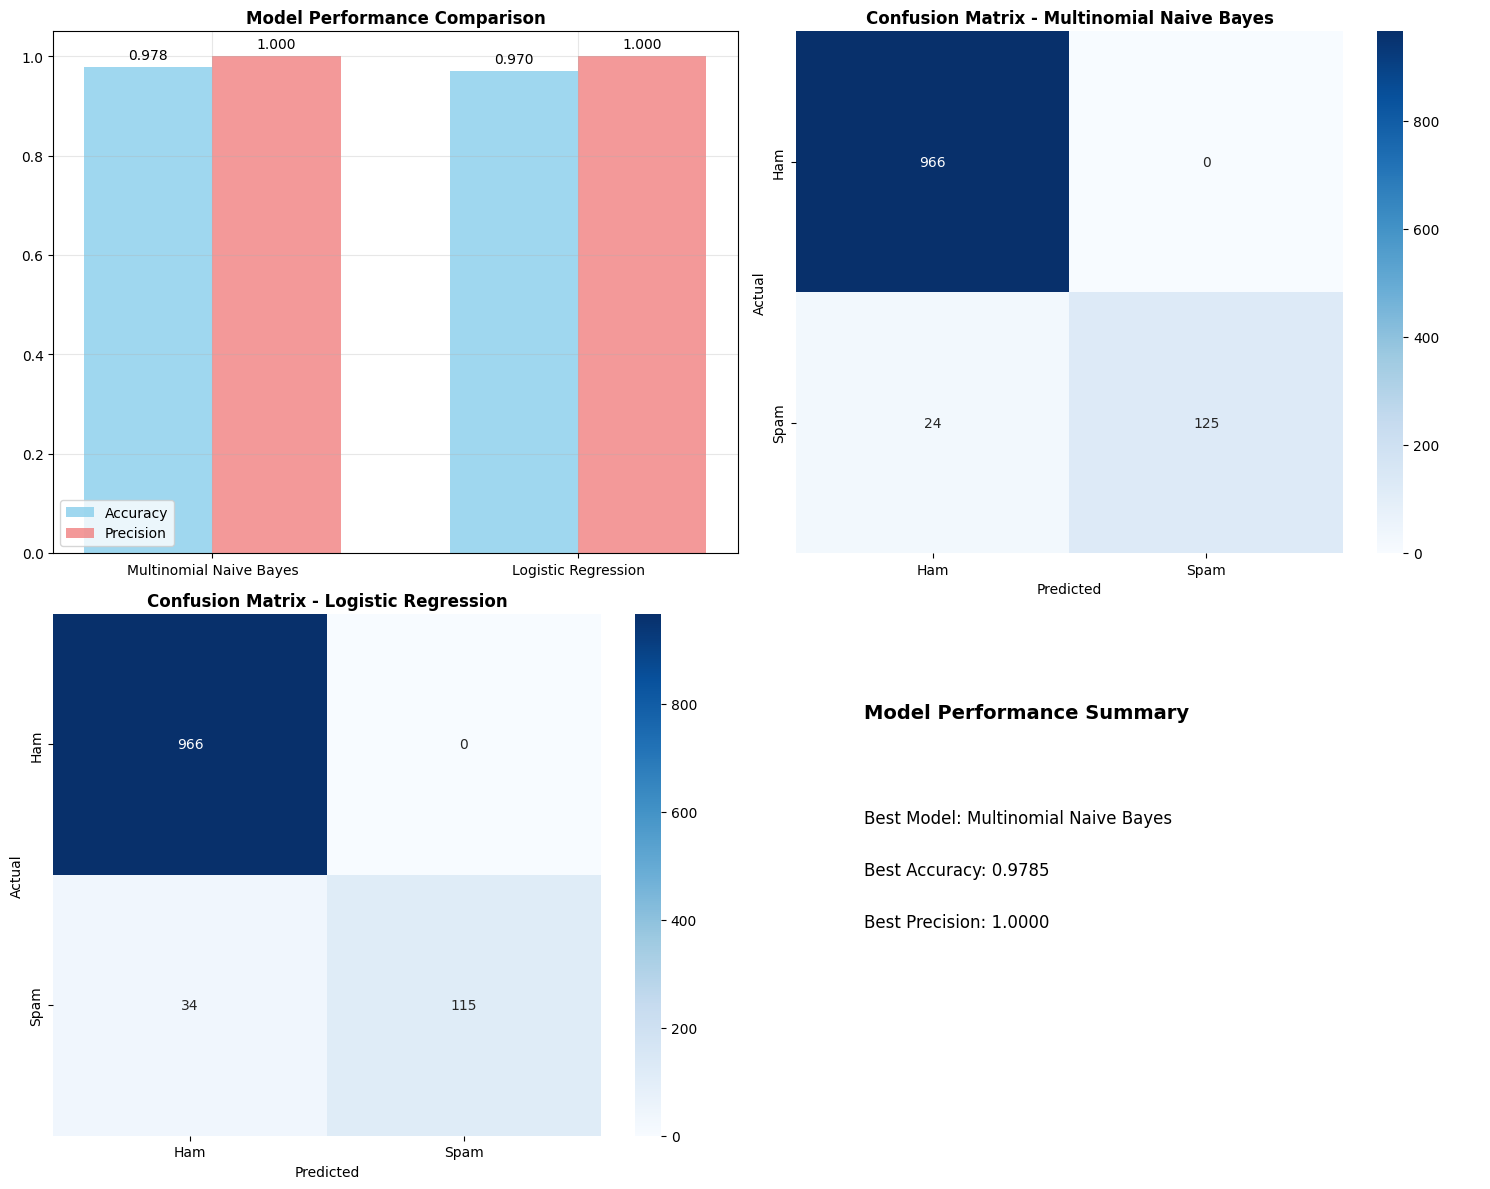


🏆 Best model: Multinomial Naive Bayes

💾 Saving model files for deployment...
✅ Saved vectorizer.pkl and model.pkl

🧪 Testing the model with example messages...
Message 1: Congratulations! You've won a $1000 Walmart gift card. Text YES to claim.
Prediction: SPAM (Confidence: 0.7023)
Spam Probability: 0.7023
Ham Probability: 0.2977
--------------------------------------------------
Message 2: Hey, are we still meeting for lunch tomorrow?
Prediction: HAM (Confidence: 0.9974)
Spam Probability: 0.0026
Ham Probability: 0.9974
--------------------------------------------------
Message 3: URGENT: Your bank account has been suspended. Click here to verify your details.
Prediction: HAM (Confidence: 0.5047)
Spam Probability: 0.4953
Ham Probability: 0.5047
--------------------------------------------------
Message 4: Ok, see you later. Thanks for the update.
Prediction: HAM (Confidence: 0.9900)
Spam Probability: 0.0100
Ham Probability: 0.9900
--------------------------------------------------
Me

In [11]:
# Step 1: Setup - Import necessary libraries
import pandas as pd
import numpy as np
import nltk
import re
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report

# Download required NLTK data (only valid resource names)
print("Downloading NLTK resources...")
nltk.download('stopwords')
nltk.download('punkt')   # tokenizers/punkt

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

print("All libraries imported successfully!")
print("NLTK data downloaded!")

# Step 2: Data Loading - Manual Upload Option
print("📁 DATASET UPLOAD")
print("=" * 50)

from google.colab import files
import io
import os

df = None

# Check if files already exist in the environment
print("Checking for existing dataset files...")
existing_files = [f for f in os.listdir('.') if f.lower().endswith('.csv')]
if existing_files:
    print(f"Found existing CSV files: {existing_files}")
    for file in existing_files:
        try:
            df = pd.read_csv(file, encoding='latin-1')
            print(f"✅ Successfully loaded from existing file: '{file}'")
            break
        except Exception as e:
            print(f"❌ Failed to load '{file}': {e}")

# If no existing files or loading failed, ask for manual upload
if df is None:
    print("\n📤 No dataset found. Please upload your CSV file.")
    print("Click on 'Choose Files' below to upload your dataset...")

    try:
        uploaded = files.upload()

        if uploaded:
            # Get the first uploaded file
            file_name = list(uploaded.keys())[0]
            print(f"📥 Uploaded file: {file_name}")

            # Read the uploaded file
            df = pd.read_csv(io.BytesIO(uploaded[file_name]), encoding='latin-1')
            print(f"✅ Successfully loaded uploaded file: '{file_name}'")
        else:
            print("❌ No file was uploaded. Using sample data for demonstration...")
            # Create sample data as fallback
            sample_data = {
                'label': ['ham', 'spam', 'ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham'],
                'message': [
                    'Hey, how are you doing today?',
                    'WINNER!! You have won a $1000 gift card! Call now!',
                    'Lets meet for lunch tomorrow',
                    'URGENT: Your bank account needs verification',
                    'Ok, see you later',
                    'FREE entry to win a new car!',
                    'Thanks for the update',
                    'Can you call me when you get this?',
                    'Congratulations! You won a prize!',
                    'Dinner is ready'
                ]
            }
            df = pd.DataFrame(sample_data)
            print("📝 Using sample dataset for demonstration")

    except Exception as e:
        print(f"❌ Upload failed: {e}")
        print("📝 Using sample dataset for demonstration...")
        # Create sample data as fallback
        sample_data = {
            'label': ['ham', 'spam', 'ham', 'spam', 'ham'],
            'message': [
                'Hey, how are you doing today?',
                'WINNER!! You have won a $1000 gift card! Call now!',
                'Lets meet for lunch tomorrow',
                'URGENT: Your bank account needs verification',
                'Ok, see you later'
            ]
        }
        df = pd.DataFrame(sample_data)

print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nDataset columns:", df.columns.tolist())
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Step 3: Data Cleaning & Preprocessing - AUTO DETECT COLUMNS
print("\nAnalyzing dataset structure...")

label_col = None
message_col = None

label_patterns = ['label', 'type', 'v1', 'class', 'category', 'spam', 'target', 'output']
message_patterns = ['message', 'text', 'v2', 'sms', 'content', 'body', 'email', 'data']

for col in df.columns:
    col_lower = str(col).lower()
    if any(pattern in col_lower for pattern in label_patterns):
        label_col = col
    if any(pattern in col_lower for pattern in message_patterns):
        message_col = col

# Heuristic fallback
if label_col is None or message_col is None:
    print("🤔 Could not auto-detect columns. Using heuristic approach...")
    text_cols = [col for col in df.columns if df[col].dtype == 'object']
    if text_cols:
        # choose the column with the largest average length as message
        avg_lengths = {col: df[col].astype(str).apply(len).mean() for col in text_cols}
        message_col = max(avg_lengths, key=avg_lengths.get)
        # choose another text column as label if possible
        label_candidates = [c for c in text_cols if c != message_col]
        label_col = label_candidates[0] if label_candidates else df.columns[0]
    else:
        # last resort: first two columns
        label_col = df.columns[0]
        message_col = df.columns[1]

df_clean = df[[label_col, message_col]].copy()
df_clean.columns = ['label', 'message']
print(f"\n✅ Using columns: '{label_col}' as label, '{message_col}' as message")
print(f"Final dataset shape: {df_clean.shape}")

# Drop missing values and unify types
print(f"\nCleaning data...")
initial_count = len(df_clean)
df_clean = df_clean.dropna().reset_index(drop=True)
final_count = len(df_clean)
print(f"Removed {initial_count - final_count} rows with missing values")

df_clean['label'] = df_clean['label'].astype(str).str.strip().str.lower()
df_clean['message'] = df_clean['message'].astype(str)

# Map labels to 0/1
unique_labels = df_clean['label'].unique()
print(f"Unique labels found: {unique_labels}")

label_mapping = {}
for label in unique_labels:
    s = str(label).lower()
    if any(ind in s for ind in ['spam', '1', 'yes', 'true', 'bad', 'junk']):
        label_mapping[label] = 1
        print(f"  '{label}' → 1 (spam)")
    else:
        label_mapping[label] = 0
        print(f"  '{label}' → 0 (ham)")

df_clean['label_encoded'] = df_clean['label'].map(label_mapping)

print("\nLabel distribution:")
print(df_clean['label'].value_counts())
print(f"\nEncoded labels:\n{df_clean['label_encoded'].value_counts()}")

# Visualization: distribution and message length
print("\n📊 Generating visualizations...")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
label_counts = df_clean['label'].value_counts()
axes[0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', startangle=90,
            colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Distribution of Spam vs Ham Messages', fontweight='bold')

df_clean['message_length'] = df_clean['message'].apply(lambda x: len(str(x)))
df_clean.boxplot(column='message_length', by='label_encoded', ax=axes[1])
axes[1].set_title('Message Length by Label', fontweight='bold')
axes[1].set_ylabel('Message Length (characters)')
axes[1].set_xlabel('Label (0=Ham, 1=Spam)')

plt.suptitle('Dataset Overview', fontweight='bold')
plt.tight_layout()
plt.show()

# Step 4: Text Preprocessing
print("\n🔧 Preprocessing text messages...")
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    try:
        tokens = word_tokenize(text)
    except Exception:
        tokens = text.split()
    processed = []
    for token in tokens:
        if token.isalpha() and token not in stop_words:
            processed.append(stemmer.stem(token))
    return ' '.join(processed)

df_clean['processed_message'] = df_clean['message'].apply(preprocess_text)
print("✅ Text preprocessing completed!")

# Show example of preprocessing
print("\n📝 Preprocessing example:")
print("Original:", df_clean['message'].iloc[0][:100] + "...")
print("Processed:", df_clean['processed_message'].iloc[0])

# WordClouds
print("\n🎨 Generating word clouds...")
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Spam word cloud
spam_messages = df_clean[df_clean['label_encoded'] == 1]['processed_message']
spam_text = ' '.join(spam_messages) if len(spam_messages) > 0 else ""

if spam_text.strip():
    wc_spam = WordCloud(width=600, height=400, background_color='white', max_words=100, colormap='Reds').generate(spam_text)
    axes[0].imshow(wc_spam, interpolation='bilinear')
    axes[0].set_title('Most Common Words in SPAM Messages', fontsize=14, fontweight='bold')
else:
    axes[0].text(0.5, 0.5, 'No spam messages available', ha='center', va='center', fontsize=12)
    axes[0].set_title('SPAM Messages Word Cloud', fontsize=14, fontweight='bold')
axes[0].axis('off')

# Ham word cloud
ham_messages = df_clean[df_clean['label_encoded'] == 0]['processed_message']
ham_text = ' '.join(ham_messages) if len(ham_messages) > 0 else ""

if ham_text.strip():
    wc_ham = WordCloud(width=600, height=400, background_color='white', max_words=100, colormap='Greens').generate(ham_text)
    axes[1].imshow(wc_ham, interpolation='bilinear')
    axes[1].set_title('Most Common Words in HAM Messages', fontsize=14, fontweight='bold')
else:
    axes[1].text(0.5, 0.5, 'No ham messages available', ha='center', va='center', fontsize=12)
    axes[1].set_title('HAM Messages Word Cloud', fontsize=14, fontweight='bold')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Step 5: Feature Extraction
print("\n🔡 Performing feature extraction with TF-IDF...")
tfidf_vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df_clean['processed_message'])
y = df_clean['label_encoded']
print(f"✅ Feature extraction completed! Shape: {X.shape}")

# Step 6: Model Training & Evaluation
print("\n🤖 Training machine learning models...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

models = {
    'Multinomial Naive Bayes': MultinomialNB(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000)
}
results = {}

for model_name, model in models.items():
    print(f"\n🔧 Training {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)
    results[model_name] = {'model': model, 'accuracy': acc, 'precision': prec, 'confusion_matrix': cm, 'predictions': y_pred}
    print(f"✅ {model_name} -> Accuracy: {acc:.4f}, Precision: {prec:.4f}")
    print("Confusion Matrix:\n", cm)

# Visualization: model metrics and confusion matrices
print("\n📈 Generating model performance visualizations...")
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# bar plot for metrics (axes[0,0])
metrics_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results],
    'Precision': [results[m]['precision'] for m in results]
})
x = np.arange(len(metrics_df))
width = 0.35
bars1 = axes[0,0].bar(x - width/2, metrics_df['Accuracy'], width, label='Accuracy', alpha=0.8, color='skyblue')
bars2 = axes[0,0].bar(x + width/2, metrics_df['Precision'], width, label='Precision', alpha=0.8, color='lightcoral')
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(metrics_df['Model'])
axes[0,0].set_title('Model Performance Comparison', fontweight='bold')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.3f}', ha='center', va='bottom')

# confusion matrix plots into axes[0,1] and axes[1,0]
cm_axes = [(0,1), (1,0)]
for (ax_row, ax_col), (model_name, res) in zip(cm_axes, results.items()):
    sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'], ax=axes[ax_row, ax_col])
    axes[ax_row, ax_col].set_title(f'Confusion Matrix - {model_name}', fontweight='bold')
    axes[ax_row, ax_col].set_xlabel('Predicted')
    axes[ax_row, ax_col].set_ylabel('Actual')

# Leave axes[1,1] for model summary
axes[1,1].text(0.1, 0.8, 'Model Performance Summary', fontsize=14, fontweight='bold')
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_acc = results[best_model_name]['accuracy']
best_prec = results[best_model_name]['precision']
axes[1,1].text(0.1, 0.6, f'Best Model: {best_model_name}', fontsize=12)
axes[1,1].text(0.1, 0.5, f'Best Accuracy: {best_acc:.4f}', fontsize=12)
axes[1,1].text(0.1, 0.4, f'Best Precision: {best_prec:.4f}', fontsize=12)
axes[1,1].axis('off')

plt.tight_layout()
plt.show()

# Choose best model by accuracy
best_model_name = max(results.keys(), key=lambda x: results[x]['accuracy'])
best_model = results[best_model_name]['model']
print(f"\n🏆 Best model: {best_model_name}")

# Save vectorizer and model
print("\n💾 Saving model files for deployment...")
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
with open('model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
print("✅ Saved vectorizer.pkl and model.pkl")

# Safe predict function (guards for predict_proba)
def predict_spam(message, vectorizer, model):
    processed_message = preprocess_text(message)
    features = vectorizer.transform([processed_message])
    prediction = model.predict(features)[0]
    # get probabilities if available
    if hasattr(model, "predict_proba"):
        proba = model.predict_proba(features)[0]
        ham_prob = proba[0]
        spam_prob = proba[1] if len(proba) > 1 else 0.0
    else:
        ham_prob = 1.0 if prediction == 0 else 0.0
        spam_prob = 1.0 - ham_prob
    return {
        'prediction': 'spam' if int(prediction) == 1 else 'ham',
        'spam_probability': float(spam_prob),
        'ham_probability': float(ham_prob),
        'confidence': float(max(spam_prob, ham_prob))
    }

# Test the model
print("\n🧪 Testing the model with example messages...")
test_messages = [
    "Congratulations! You've won a $1000 Walmart gift card. Text YES to claim.",
    "Hey, are we still meeting for lunch tomorrow?",
    "URGENT: Your bank account has been suspended. Click here to verify your details.",
    "Ok, see you later. Thanks for the update.",
    "FREE entry to win a new car! Reply NOW to claim your prize!",
    "Hi mom, can you pick me up from school today?"
]

print("=" * 60)
for i, message in enumerate(test_messages, 1):
    result = predict_spam(message, tfidf_vectorizer, best_model)
    print(f"Message {i}: {message}")
    print(f"Prediction: {result['prediction'].upper()} (Confidence: {result['confidence']:.4f})")
    print(f"Spam Probability: {result['spam_probability']:.4f}")
    print(f"Ham Probability: {result['ham_probability']:.4f}")
    print("-" * 50)

print("\n🎉 SPAM DETECTION MODEL TRAINING COMPLETED!")
print("📁 Files created for deployment:")
print("   - vectorizer.pkl (TF-IDF vectorizer)")
print("   - model.pkl (Trained classification model)")
print("\n🚀 Your model is ready to use!")